In [5]:
%matplotlib inline

In [1]:
import pandas as pd

In [8]:
# theoretical data
dice_values = [1, 2, 3, 4, 5, 6]
numbers_counts = {}
for dice1 in dice_values:
    for dice2 in dice_values:
        dice_sum = dice1 + dice2
        if dice_sum in numbers_counts:
            numbers_counts[dice_sum] += 1
        else:
            numbers_counts[dice_sum] = 1

In [14]:
t_df = pd.DataFrame({
    "number": numbers_counts.keys(),
    "count": numbers_counts.values()
})
t_df

,count,number
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6
5,6,7
6,5,8
7,4,9
8,3,10
9,2,11


In [25]:
t_df["prob"] = t_df["count"] / t_df["count"].sum()
t_df

,count,number,prob
0,1,2,0.027778
1,2,3,0.055556
2,3,4,0.083333
3,4,5,0.111111
4,5,6,0.138889
5,6,7,0.166667
6,5,8,0.138889
7,4,9,0.111111
8,3,10,0.083333
9,2,11,0.055556


In [26]:
# experimental data
e_df = pd.read_csv("data.csv")
e_df["count"] = 1.0
e_df = e_df.groupby("number").sum()
e_df["number"] = e_df.index.astype(float)
e_df["prob"] = e_df["count"] / e_df["count"].sum()
e_df

,Unnamed: 0,count,number,prob
number,,,,
2,19,2.0,2.0,0.054054
3,97,4.0,3.0,0.108108
4,7,2.0,4.0,0.054054
5,63,3.0,5.0,0.081081
6,171,9.0,6.0,0.243243
7,83,3.0,7.0,0.081081
8,39,5.0,8.0,0.135135
9,113,5.0,9.0,0.135135
10,49,2.0,10.0,0.054054


In [35]:
df = pd.merge(t_df, e_df, on="number", how="outer", suffixes=["_theoretical", "_experimental"])
df

,count_theoretical,number,prob_theoretical,Unnamed: 0,count_experimental,prob_experimental
0,1,2,0.027778,19.0,2.0,0.054054
1,2,3,0.055556,97.0,4.0,0.108108
2,3,4,0.083333,7.0,2.0,0.054054
3,4,5,0.111111,63.0,3.0,0.081081
4,5,6,0.138889,171.0,9.0,0.243243
5,6,7,0.166667,83.0,3.0,0.081081
6,5,8,0.138889,39.0,5.0,0.135135
7,4,9,0.111111,113.0,5.0,0.135135
8,3,10,0.083333,49.0,2.0,0.054054
9,2,11,0.055556,25.0,2.0,0.054054


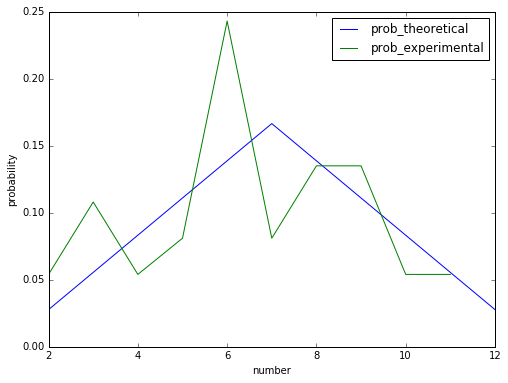

In [38]:
ax = df.plot(x="number", y=["prob_theoretical", "prob_experimental"], figsize=(8,6))
ax.set_ylabel("probability")